In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('Cargo.csv')

In [4]:
df.head()

,Month,Cargo Traffic (‘000 Tonnes)
0,1995-01-01,8005
1,1996-01-01,8884
2,1997-01-01,12453
3,1998-01-01,15282
4,1999-01-01,14206


In [5]:
df.tail()

,Month,Cargo Traffic (‘000 Tonnes)
21,2016-01-01,35582
22,2017-01-01,39945
23,2018-01-01,42055
24,2019-01-01,42508
25,2020-01-01,39145


In [7]:
df.columns=["Year","Cargo"]
df.head()

,Year,Cargo
0,1995-01-01,8005
1,1996-01-01,8884
2,1997-01-01,12453
3,1998-01-01,15282
4,1999-01-01,14206


In [8]:
df['Year']=pd.to_datetime(df['Year'])

In [9]:
df.head()

,Year,Cargo
0,1995-01-01,8005
1,1996-01-01,8884
2,1997-01-01,12453
3,1998-01-01,15282
4,1999-01-01,14206


In [10]:
df.set_index('Year',inplace=True)
df.head()

,Cargo
Year,
1995-01-01,8005
1996-01-01,8884
1997-01-01,12453
1998-01-01,15282
1999-01-01,14206


In [11]:
df.describe()

,Cargo
count,26.000000
mean,28663.076923
std,11055.865969
min,8005.000000
25%,17672.750000
50%,33416.000000
75%,36659.750000
max,42508.000000


<Axes: xlabel='Year'>

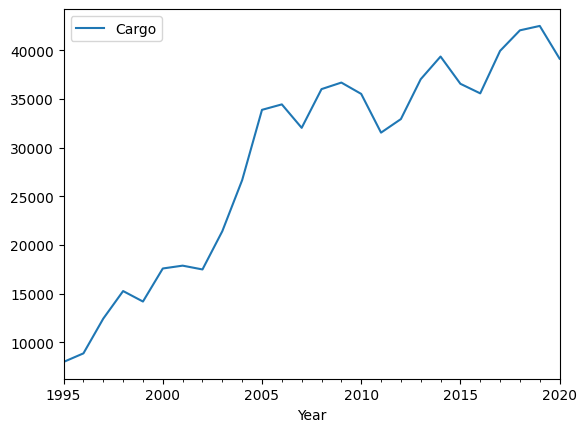

In [12]:
df.plot()

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
def adfuller_test(Cargo):
    result=adfuller(Cargo)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [15]:
adfuller_test(df['Cargo'])

ADF Test Statistic : -4.29279134112987
p-value : 0.0004571553046200861
#Lags Used : 7
Number of Observations Used : 18
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


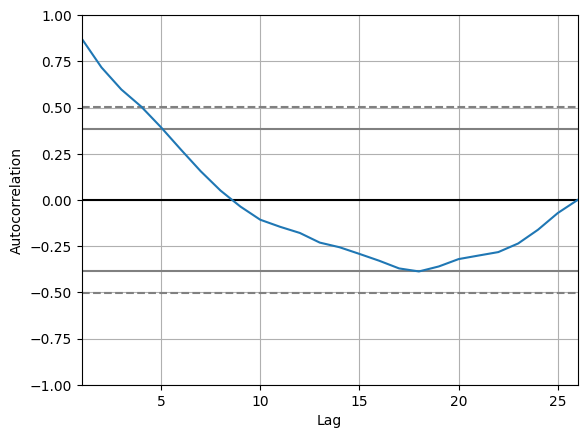

In [16]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Cargo'])
plt.show()

In [17]:
import statsmodels.api as sm

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


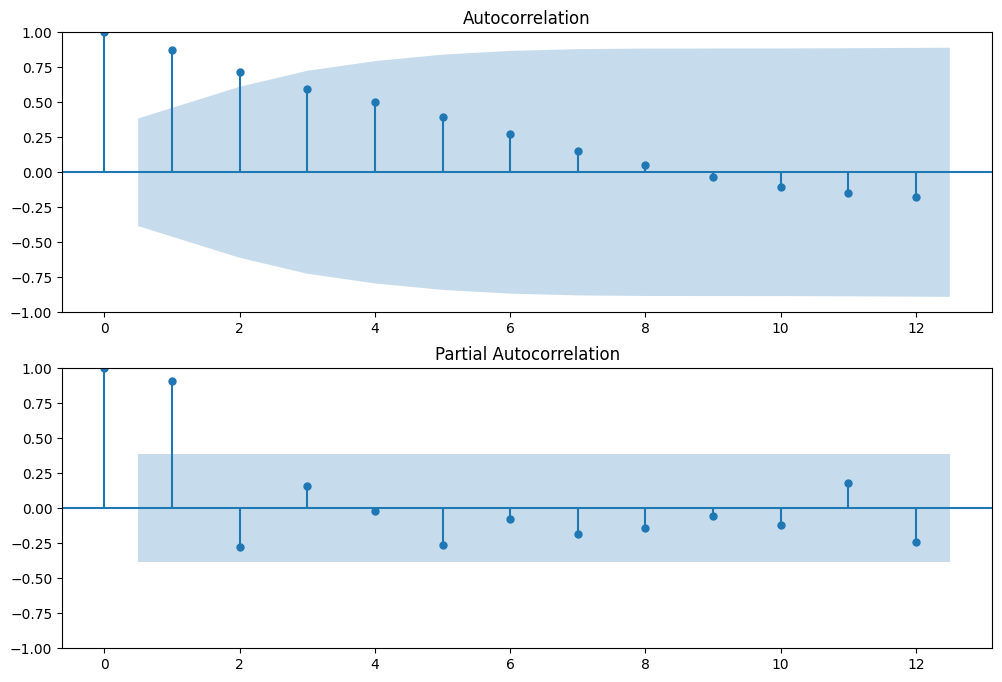

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Cargo'],lags=12,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Cargo'],lags=12,ax=ax2)

In [23]:
from statsmodels.tsa.arima.model import ARIMA

In [24]:
model=ARIMA(df['Cargo'],order=(1,0,1))
model_fit=model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [25]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Cargo   No. Observations:                   26
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -244.764
Date:                Tue, 11 Apr 2023   AIC                            497.528
Time:                        04:10:30   BIC                            502.561
Sample:                    01-01-1995   HQIC                           498.977
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.866e+04   1.17e+04      2.460      0.014    5824.694    5.15e+04
ar.L1          0.9471      0.095      9.956      0.000       0.761       1.134
ma.L1          0.5233      0.239      2.186      0.029       0.054       0.992
sigma2      7.836e+06      0.499   1.57e+07      0.000    7.84e+06    7.84e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):                 1.19
Prob(Q):                              0.46   Prob(JB):                         0.55
Heteroskedasticity (H):               0.98   Skew:                            -0.05
Prob(H) (two-sided):                  0.97   Kurtosis:                         1.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.95e+25. Standard errors may be unstable.
"""

<Axes: xlabel='Year'>

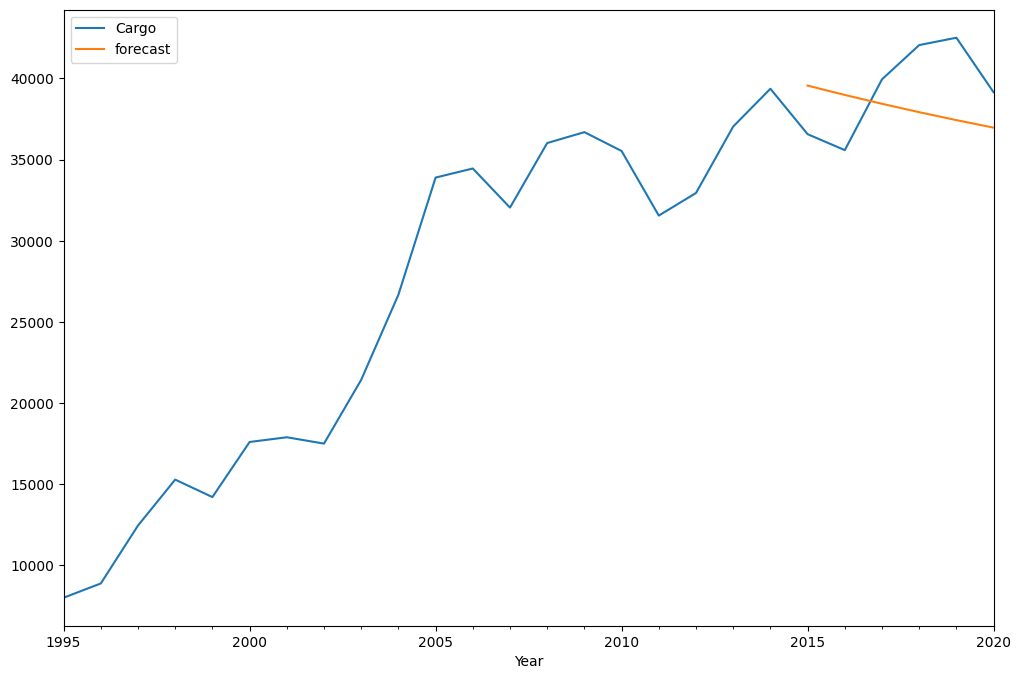

In [26]:
df['forecast']=model_fit.predict(start=20,end=26,dynamic=True)
df[['Cargo','forecast']].plot(figsize=(12,8))

In [27]:
model=sm.tsa.statespace.SARIMAX(df['Cargo'],order=(1, 0, 1),seasonal_order=(1,1,1,5))
results=model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Year'>

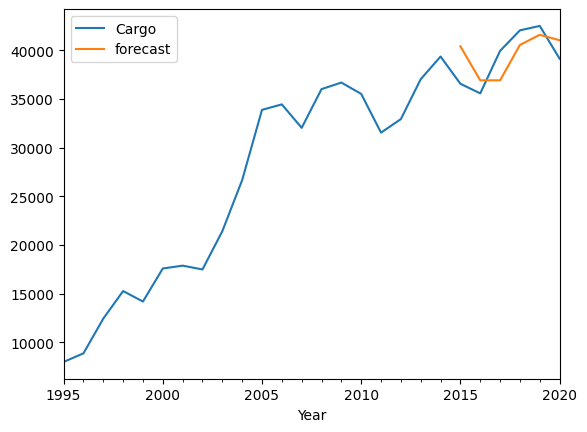

In [28]:
df['forecast']=results.predict(start=20,end=26,dynamic=True)
df[['Cargo','forecast']].plot()

In [38]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(years=x)for x in range(0,6)]

In [39]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [40]:
future_datest_df.tail()

,Cargo,forecast
2021-01-01,NaN,NaN
2022-01-01,NaN,NaN
2023-01-01,NaN,NaN
2024-01-01,NaN,NaN
2025-01-01,NaN,NaN


In [41]:
future_df=pd.concat([df,future_datest_df])

<Axes: >

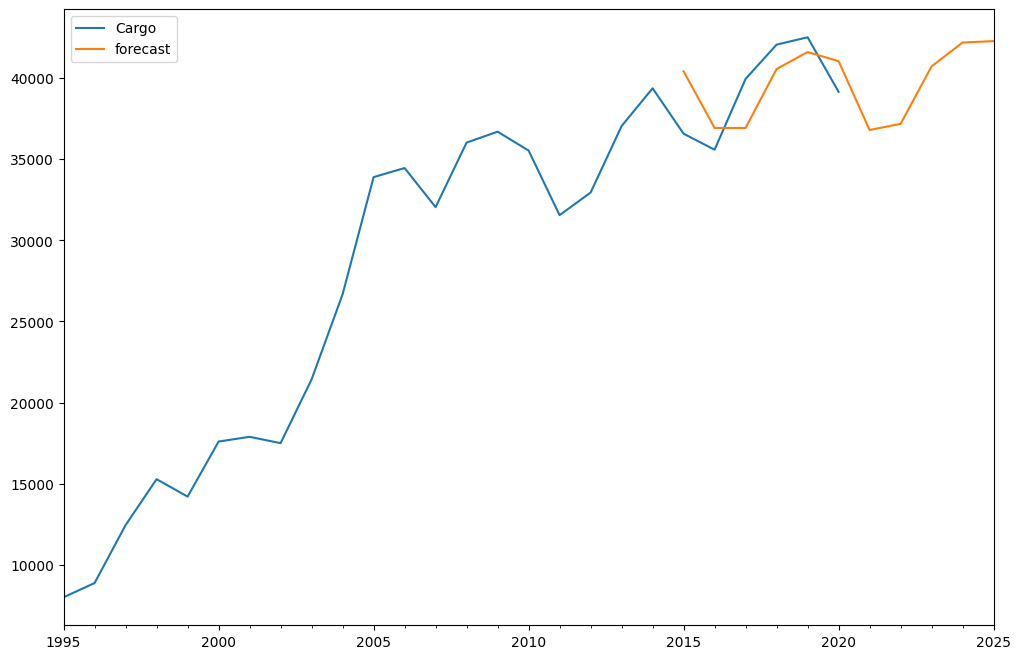

In [42]:
future_df['forecast'] = results.predict(start = 20, end = 32, dynamic= True)  
future_df[['Cargo', 'forecast']].plot(figsize=(12, 8))

In [43]:
future_df[['Cargo', 'forecast']]

,Cargo,forecast
1995-01-01,8005,NaN
1996-01-01,8884,NaN
1997-01-01,12453,NaN
1998-01-01,15282,NaN
1999-01-01,14206,NaN
2000-01-01,17600,NaN
2001-01-01,17891,NaN
2002-01-01,17501,NaN
2003-01-01,21430,NaN
2004-01-01,26673,NaN
